In [1]:
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import pandas as pd
import tensorflow_probability as tfp
import time  
import sim
import compare

C:\Users\pinak\Documents\GitHub\sphere-fp


<IPython.core.display.Javascript object>


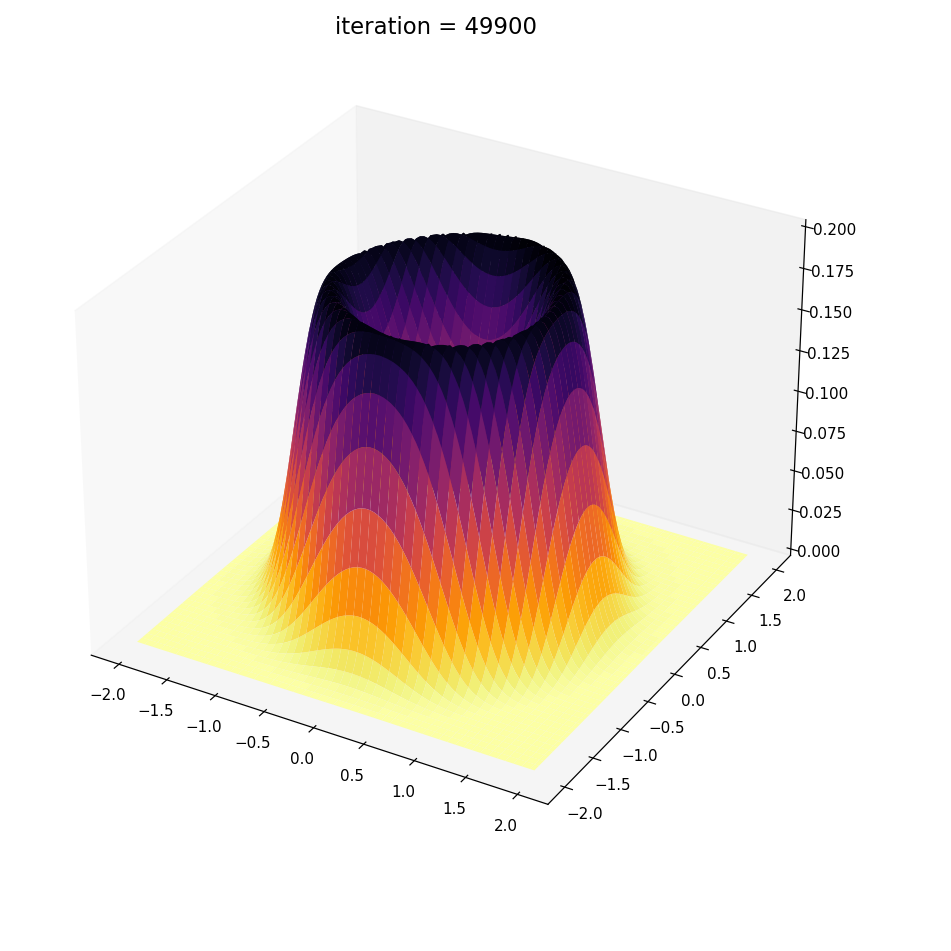

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

dim = 2

def get_net(iter):
    net = arch.LSTMForgetNet(num_nodes=50, num_blocks=3)
    net.load_weights('../../data/{0}D-true-vs-learned/sphere{0}D_{1}'.format(dim, iter)).expect_partial()
    return net

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
low = [-2., -2.]
high = [2., 2.]
resolution = 100
x = np.linspace(low[0], high[0], num=resolution, endpoint=True).astype('float32')
y = np.linspace(low[1], high[1], num=resolution, endpoint=True).astype('float32')
y = np.repeat(y, resolution, axis=0).reshape((-1, 1))
x = np.array(list(x) * resolution).reshape((-1, 1))
iters = list(range(0, 50000, 100))
z = [get_net(iter) for iter in iters]
delta = 4.0 / (resolution-1)

def func(frame):
    ax.clear()
    z_l = np.exp(z[int(frame/100)](x, y).numpy())
    z_l /= (z_l.sum() * delta**2)
    grid = (resolution, resolution)
    x_ = x.reshape(grid)
    y_ = y.reshape(grid)
    z_l = z_l.reshape(grid)
    im = ax.plot_surface(x_, y_, z_l, cmap='inferno_r')
    ax.set_title('iteration = {}'.format(frame), fontsize=15)
    ax.set_zlim(0, 0.2)
    ax.grid(False)
    plt.tight_layout()
    #fig.colorbar(im, ax=ax)
anim = animation.FuncAnimation(fig=fig, func=func, frames=iters, repeat=False)
anim.save('learning.mp4', writer='ffmpeg', fps=24)

In [17]:
np.linspace(-2, 2, 3)

array([-2.,  0.,  2.])